In [6]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen('https://www.python.org')
#print(response.read().decode('utf-8'))

In [7]:
import pandas as pd
import json 
import xmltodict
from Bio import Medline
from Bio import Entrez
Entrez.email = "folooyi@outlook.com" # replace it with your email

In [81]:

from pymed import PubMed
from datetime import date

pubmed = PubMed(tool="PubMedSearcher", email="folooyi@outlook.com")

## PUT YOUR SEARCH TERM HERE ##
search_term = "Stomach Cancer"
results = pubmed.query(search_term, max_results=1500)

articleList = []
articleInfo = []

for article in results:
# Print the type of object we've found (can be either PubMedBookArticle or PubMedArticle).
# We need to convert it to dictionary with available function
    articleDict = article.toDict()
    articleList.append(articleDict)

# Generate list of dict records which will hold all article details that could be fetch from PUBMED API

for article in articleList:
#Sometimes article['pubmed_id'] contains list separated with comma - take first pubmedId in that list - thats article pubmedId
    pubmedId = article['pubmed_id'].partition('\n')[0]
    info_dict = {u'pubmed_id':pubmedId,
                   u'title':article['title'],
                   u'abstract':article['abstract'],
                   u'copyrights':article['copyrights'],
                   #u'doi':article['doi'],
                   u'publication_date':article['publication_date'], 
                   u'authors':article['authors']}
    
    info_dict[u'keywords'] = article['keywords'] if 'keywords' in article else "none"
    info_dict[u'journal'] = article['journal'] if 'journal' in article else "none"
    info_dict[u'conclusions'] = article['conclusions'] if 'conclusions' in article else "none"
    info_dict[u'methods'] = article['methods'] if 'methods' in article else "none"
    info_dict[u'results'] = article['results'] if 'results' in article else "none"
    #info_dict[u'xml'] = article['xml'] if 'xml' in article else "none"
    # Append article info to dictionary
    articleInfo.append(info_dict)


# Generate Pandas DataFrame from list of dictionaries
articlesPD = pd.DataFrame.from_dict(articleInfo)
export_csv = articlesPD.to_csv (r'search.csv', index = None, header=True) 

#Print first 10 rows of dataframe
print(articlesPD.head(10))

  pubmed_id                                              title  \
0  33181813  [Why is it important to detect atrophic gastri...   
1  33181754  18F-FDG PET/CT in a Rare Case of Poland Syndro...   
2  33181006  Postgastrectomy gastric cancer patients are at...   
3  33180314  Colonic interposition, a contemporary experien...   
4  33179620  Precancerous lesions of the stomach, gastric c...   
5  33179005  Voluminous abdominal gastrointestinal stromal ...   
6  33178597  Crosstalk Between Cancer Associated Fibroblast...   
7  33178590  Spectrum of Mesenchymal-Epithelial Transition ...   
8  33177022  [Tubular gastric elongation surgery for high e...   
9  33176054  Innovative marking method using novel endoscop...   

                                            abstract  \
0  Gastric intestinal metaplasia and atrophic gas...   
1  Poland syndrome is a rare congenital anomaly c...   
2  Several studies have shown that colorectal neo...   
3  Colonic interposition is rarely used as an oes

In [83]:
articlesPD

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results
0,33181813,[Why is it important to detect atrophic gastri...,Gastric intestinal metaplasia and atrophic gas...,None,2020-11-13,"[{'lastname': 'Sarem', 'firstname': 'Muhannad'...",[],Revista de gastroenterologia del Peru : organo...,None,None,None
1,33181754,18F-FDG PET/CT in a Rare Case of Poland Syndro...,Poland syndrome is a rare congenital anomaly c...,None,2020-11-13,"[{'lastname': 'Loharkar', 'firstname': 'Sarves...",[],Clinical nuclear medicine,None,None,None
2,33181006,Postgastrectomy gastric cancer patients are at...,Several studies have shown that colorectal neo...,None,2020-11-13,"[{'lastname': 'Gweon', 'firstname': 'Tae-Geun'...","[Colonoscopic surveillance, Colonoscopy, Color...",Intestinal research,None,None,None
3,33180314,"Colonic interposition, a contemporary experien...",Colonic interposition is rarely used as an oes...,None,2020-11-13,"[{'lastname': 'Fearon', 'firstname': 'Naomi M'...","[Colon interposition, Oesophageal cancer, Surg...",Updates in surgery,None,None,None
4,33179620,"Precancerous lesions of the stomach, gastric c...",Gastric cancer accounts for about 6% of cancer...,Copyright © 2020 Società Italiana di Anatomia ...,2020-11-13,"[{'lastname': 'Gullo', 'firstname': 'Irene', '...","[gastric adenocarcinoma, gastric cancer, gastr...",Pathologica,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1494,32160618,The Potential Role of Radiotherapy in the Mana...,Hepatoid adenocarcinoma (AC) of the stomach (H...,"© 2020 S. Karger AG, Basel.",2020-03-12,"[{'lastname': 'Ilyas', 'firstname': 'Waqas', '...","[Gastric cancer, Gastrointestinal cancer, Hepa...",Oncology research and treatment,RT may have a role in the multimodality manage...,None,None
1495,32160410,Inferior prognosis of gastric involvement in p...,Due to limited information reported on the cli...,© 2020 The Authors. Cancer Medicine published ...,2020-03-12,"[{'lastname': 'Xie', 'firstname': 'Yi', 'initi...","[SEER, gastric cancer, lymphoma, prognostic fa...",Cancer medicine,None,None,None
1496,32159312,[Differential diagnostics of gastric cancer an...,The lack of specific symptoms for the early de...,None,2020-03-12,"[{'lastname': 'Titov', 'firstname': 'S E', 'in...","[dysplasia, gastric cancer, miRNA, molecular d...",Klinicheskaia laboratornaia diagnostika,None,None,None
1497,32158613,,,© 2019 The Author(s). Published by Informa UK ...,2020-03-12,"[{'lastname': 'Lee', 'firstname': 'Hana', 'ini...","[Geranium thunbergii, apoptosis, cell cycle ar...",Animal cells and systems,None,None,None


In [85]:
import pandas as pd

df1 = pd.read_csv('search.csv', engine='python')
df1["journal"] = df1["journal"].str.lower()
df2 = pd.read_csv('journal.csv', engine='python')
df2["journal"] = df2["journal"].str.lower()

df = df1.merge(df2, on='journal',how = 'left')
export_csv = df.to_csv (r'search_with_journal.csv', index = None, header=True) 
#df = df.sort_values(by=["Journal Impact Factor"],ascending=False)
df

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score
0,33181813,[Why is it important to detect atrophic gastri...,Gastric intestinal metaplasia and atrophic gas...,NaN,2020-11-13,"[{'lastname': 'Sarem', 'firstname': 'Muhannad'...",[],revista de gastroenterologia del peru : organo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33181754,18F-FDG PET/CT in a Rare Case of Poland Syndro...,Poland syndrome is a rare congenital anomaly c...,NaN,2020-11-13,"[{'lastname': 'Loharkar', 'firstname': 'Sarves...",[],clinical nuclear medicine,NaN,NaN,NaN,671,"5,042",6.587,0.00620
2,33181006,Postgastrectomy gastric cancer patients are at...,Several studies have shown that colorectal neo...,NaN,2020-11-13,"[{'lastname': 'Gweon', 'firstname': 'Tae-Geun'...","['Colonoscopic surveillance', 'Colonoscopy', '...",intestinal research,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33180314,"Colonic interposition, a contemporary experien...",Colonic interposition is rarely used as an oes...,NaN,2020-11-13,"[{'lastname': 'Fearon', 'firstname': 'Naomi M'...","['Colon interposition', 'Oesophageal cancer', ...",updates in surgery,NaN,NaN,NaN,4161,913,2.587,0.00200
4,33179620,"Precancerous lesions of the stomach, gastric c...",Gastric cancer accounts for about 6% of cancer...,Copyright © 2020 Società Italiana di Anatomia ...,2020-11-13,"[{'lastname': 'Gullo', 'firstname': 'Irene', '...","['gastric adenocarcinoma', 'gastric cancer', '...",pathologica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,32160618,The Potential Role of Radiotherapy in the Mana...,Hepatoid adenocarcinoma (AC) of the stomach (H...,"© 2020 S. Karger AG, Basel.",2020-03-12,"[{'lastname': 'Ilyas', 'firstname': 'Waqas', '...","['Gastric cancer', 'Gastrointestinal cancer', ...",oncology research and treatment,RT may have a role in the multimodality manage...,NaN,NaN,5953,910,1.967,0.00266
1510,32160410,Inferior prognosis of gastric involvement in p...,Due to limited information reported on the cli...,© 2020 The Authors. Cancer Medicine published ...,2020-03-12,"[{'lastname': 'Xie', 'firstname': 'Yi', 'initi...","['SEER', 'gastric cancer', 'lymphoma', 'progno...",cancer medicine,NaN,NaN,NaN,2485,"6,732",3.491,0.01788
1511,32159312,[Differential diagnostics of gastric cancer an...,The lack of specific symptoms for the early de...,NaN,2020-03-12,"[{'lastname': 'Titov', 'firstname': 'S E', 'in...","['dysplasia', 'gastric cancer', 'miRNA', 'mole...",klinicheskaia laboratornaia diagnostika,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,32158613,NaN,NaN,© 2019 The Author(s). Published by Informa UK ...,2020-03-12,"[{'lastname': 'Lee', 'firstname': 'Hana', 'ini...","['Geranium thunbergii', 'apoptosis', 'cell cyc...",animal cells and systems,NaN,NaN,NaN,10220,305,0.907,0.00049


In [9]:
#the above dealing with keyword, generate keywords count csv

In [11]:
col_keywords = articlesPD['keywords'].tolist()

col_keywords = list(filter(None, col_keywords))
#col_keywords
#print((",").join(str(i) for i in col_keywords))
keywords=[]
for i in col_keywords:
    keywords+=i
print (keywords)

['Colonoscopic surveillance', 'Colonoscopy', 'Colorectal neoplasm', 'Stomach neoplasms', 'Colon interposition', 'Oesophageal cancer', 'Surgical techniques', 'Upper gastrointestinal surgery', 'gastric adenocarcinoma', 'gastric cancer', 'gastric dysplasia', 'hereditary diffuse gastric cancer (HDGC)', 'hereditary gastric cancer syndromes', 'Gastrointestinal stromal tumor (GIST)', 'case report', 'embolization', 'emergency surgery', 'radiofrequency procedure', 'cancer associated fibroblast', 'fibroblast growth factor receptor', 'gastric cancer', 'scirrhous carcinoma of the stomach', 'transforming growth factor β1', 'tumor microenvironment', 'gene alteration', 'gene mutation', 'mesenchymal–epithelial transition factor', 'outcome', 'pancancer', 'esophageal cancer', 'gastric tube', 'high esophageal-gastric anastomosis', 'tubular gastric lengthening surgery', 'gastric cancer', 'indocyanine green', 'near-infrared fluorescence', 'alpha-fetoprotein-producing gastric cancer', 'gastric cancer', 'hep

In [12]:
from wordcloud import WordCloud, STOPWORDS 
import collections
stopwords = set(STOPWORDS)

filtered_words = [word for word in keywords if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}
word_frequency = []
for letter, count in counted_words.most_common(30):
    counted_words[letter] = count
    
for i,j in counted_words.items():
        #print('Word: {0}, frequency count: {1}'.format(i,j))
        print('{0}, {1}'.format(i,j))
        #word_frequency.append('Word: {0}, frequency count: {1}'.format(i,j))
        word_frequency.append('{0},{1}'.format(i,j))


Colonoscopic surveillance, 1
Colonoscopy, 2
Colorectal neoplasm, 1
Stomach neoplasms, 82
Colon interposition, 1
Oesophageal cancer, 3
Surgical techniques, 2
Upper gastrointestinal surgery, 1
gastric adenocarcinoma, 5
gastric cancer, 110
gastric dysplasia, 1
hereditary diffuse gastric cancer (HDGC), 1
hereditary gastric cancer syndromes, 1
Gastrointestinal stromal tumor (GIST), 1
case report, 4
embolization, 1
emergency surgery, 1
radiofrequency procedure, 1
cancer associated fibroblast, 1
fibroblast growth factor receptor, 1
scirrhous carcinoma of the stomach, 1
transforming growth factor β1, 1
tumor microenvironment, 3
gene alteration, 1
gene mutation, 2
mesenchymal–epithelial transition factor, 1
outcome, 2
pancancer, 1
esophageal cancer, 11
gastric tube, 1
high esophageal-gastric anastomosis, 1
tubular gastric lengthening surgery, 1
indocyanine green, 1
near-infrared fluorescence, 1
alpha-fetoprotein-producing gastric cancer, 1
hepatoid adenocarcinoma of stomach, 1
immunotherapy, 6


Pediatrics, 1
neutrophil extracellular traps, 1
peripheral blood, 1
Average lifespan shortened, 1
Average years of life lost, 1
Premature mortality, 1
Years of life lost, 1
Image-enhanced endoscopy, 1
Metastatic gastric tumor, 1
Squamous-cell carcinoma of the cervix, 1
circRNA, 2
Fruit, 1
Vegetable, 1
tobacco smoking, 1
Cancer metastasis, 1
Malignant transformation, 1
MiR-135b, 1
Poor prognosis, 1
Malakoplakia, 1
anamorelin, 1
appetite loss, 1
bladder neoplasm, 1
chemotherapy, 7
mucositis, 2
muscle atrophy, 1
sarcopenia, 1
urothelial cancer, 1
ABVD protocol, 1
Hodgkin's lymphoma, 1
Immunohistochemistry, 4
Lymphadenopathy, 1
Primary gastric lymphoma, 2
Tlemcen (Algeria), 1
Gastric gastrointestinal stromal tumor, 1
Gender, 2
Enhanced delivery, 1
Formulation, 1
Microencapsulation, 1
Polymeric carriers, 1
Probiotics, 1
atrophic gastritis, 2
diagnostic performance, 1
gastropanel, 1
noninvasive markers, 1
Focus groups, 1
Indigenous health, 1
Qualitative research, 2
Circular-stapled anastomos

adsorption, 1
microplastics, 1
nanoplastics, 1
tetracycline, 1
Barrett’s Esophagus, 1
Esophageal Adenocarcinoma, 1
Goblet Cells, 1
Amsterdam I criteria, 1
Cancer syndrome, 1
Mismatch repair proficient, 1
Tumour spectrum, 1
Epithelium with low-grade atypia, 1
Eradication therapy, 1
Reddish depression, 1
Ramucirumab, 1
Salvage therapy, 1
Alcohol Drinking, 1
Cancer Survivors, 1
Cardiovascular Diseases, 1
Risk, 1
MLH1, 1
Fine particulate matter, 1
Public health, 2
Time-series, 1
Aortocaval lymph node, 1
Paraaortic lymph node, 1
Spermatic cord, 1
Backbone chemotherapy, 1
Human epidermal growth receptor 2, 1
Metastatic adenocarcinoma of the stomach or gastroesophageal junction, 1
Noninterventional study, 1
Real-world data, 1
Acute subdural hematoma, 1
Chronic subdural hematoma, 1
Intratumoral hemorrhage, 1
Metastatic tumor, 1
Morbidity, 3
Octogenarian, 2
POSSUM, 2
thoracotomy, 1
body composition, 1
cioelectrical impedance, 1
3D reconstruction, 1
Gastric endoscopy, 1
monocular endoscope, 1
st

In [13]:
search_wordcount = pd.DataFrame([sub.split(",") for sub in word_frequency])
#search_wordcount = search_wordcount.drop(columns=[2,3,4,5,6,7,8,9,10])
search_wordcount = search_wordcount[[0,1]]

export_csv = search_wordcount.to_csv (r'search_wordcount.csv', index = None, header=True) 
search_wordcount

,0,1
0,Colonoscopic surveillance,1
1,Colonoscopy,2
2,Colorectal neoplasm,1
3,Stomach neoplasms,82
4,Colon interposition,1
...,...,...
3445,lymphoma,1
3446,molecular diagnostics,1
3447,Geranium thunbergii,1
3448,cell cycle arrest,1


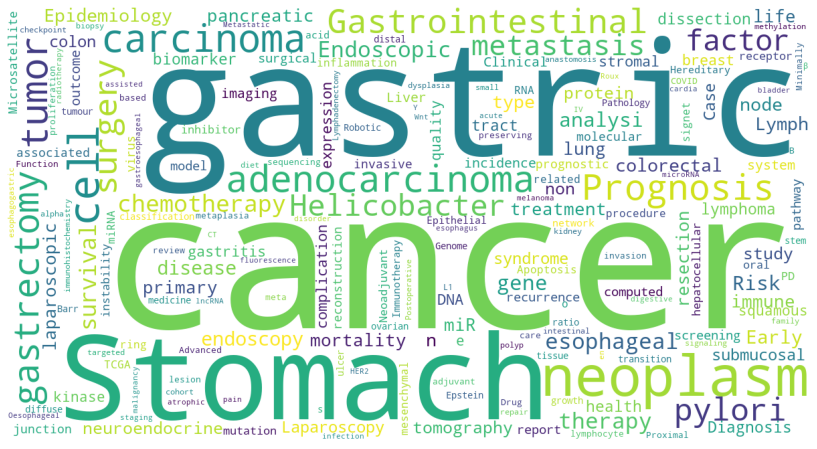

In [14]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
#convert list to string and generate
unique_string=(" ").join(keywords)
wordcloud = WordCloud(background_color="white", width = 1200, height = 650,collocations=False).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
#plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close() 

In [11]:
#dealing with author information

In [22]:
col_authors = articlesPD['authors'].tolist()
#print (col_authors)
affiliation_list=[]
for i in range(len(col_authors)):
    for j in col_authors[i]:
        if 'affiliation' in j.keys():
            affiliation_list.append(j['affiliation'])

In [23]:
import pandas as pd
def remove_none_elements_from_list(list):
     return [e for e in affiliation_list if(pd.notnull(e))]

affiliation_list

['Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'Color Genomics, 831 Mitten Road, Suite 100, Burlingame, CA, 94010, USA.',
 'From the Departments of Medical Oncology.',
 'From the Departments of Medical Oncology.',
 'From the Departments of Medical Oncology.',
 'Nuclear Medicine and Molecular Imaging, University Medical Center Groningen, University of Groningen, Groningen, the Netherlands.',
 'Nuclear Medicine and Molecular Imaging, Un

In [30]:

#import re
#affiliation_list_re=[]
#count = 0
#for i in affiliation_list:
#    count = count+1
#    line = re.sub(r"[\w\W]* ((Institute|Hospital|University|Center|Law School|School|Academy|Department)[\w -]*)[\w\W]*$", r"\1", i)
#    affiliation_list_re.append(line)
#    print (line)
#    print (i)
#    if count == 100:
#        break
#print (affiliation_list_re)

In [261]:
authors = pd.DataFrame(col_authors)  
authors_1 = authors[[0]]
authors_2 = authors[[1]]
authors_3 = authors[[2]]
authors_1

,0
0,"{'lastname': 'Berger', 'firstname': 'Mark J', ..."
1,"{'lastname': 'Boers', 'firstname': 'Jorianne',..."
2,"{'lastname': 'Usmani', 'firstname': 'Sharjeel'..."
3,"{'lastname': 'Hou', 'firstname': 'Jianjing', '..."
4,"{'lastname': 'Wang', 'firstname': 'Jian Ming',..."
...,...
995,"{'lastname': 'Ke', 'firstname': 'Qiwei', 'init..."
996,"{'lastname': 'Zhang', 'firstname': 'Wei', 'ini..."
997,"{'lastname': 'Chen', 'firstname': 'Yuanyuan', ..."
998,"{'lastname': 'Chan', 'firstname': 'Pi-Wei', 'i..."


In [ ]:
col_authors_1 = authors_1.tolist()
#print (col_authors)
affiliation_list_1=[]
for i in range(len(col_authors_1)):
    for j in col_authors[i]:
        if 'affiliation' in j.keys():
            affiliation_list.append(j['affiliation'])

In [279]:
#note: it's best to get country count, rather than just country
#using list comprehension 
Country = ' '.join(map(str, affiliation_list)) 
  

import pycountry
country_list = []
for country in pycountry.countries:
    if country.name in Country:
        country_list.append(country.name)
        print(country.name)
  

Angola
United Arab Emirates
Argentina
Australia
Austria
Belgium
Bangladesh
Bulgaria
Bahrain
Brazil
Canada
Switzerland
Chile
China
Cameroon
Colombia
Cuba
Cyprus
Germany
Denmark
Egypt
Eritrea
Spain
Ethiopia
Finland
Fiji
France
United Kingdom
Georgia
Ghana
Greece
Hong Kong
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Israel
Italy
Jersey
Jordan
Japan
Kuwait
Lebanon
Sri Lanka
Latvia
Morocco
Mexico
Mali
Mozambique
Malaysia
Namibia
Niger
Nigeria
Netherlands
Norway
New Zealand
Pakistan
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russian Federation
Saudi Arabia
Sudan
Singapore
Serbia
Slovakia
Slovenia
Sweden
Thailand
Tunisia
Turkey
Uganda
Uruguay
United States
Viet Nam
South Africa


In [ ]:
#below draw interactive node and edge

In [5]:
#for interactive node and edge
#how to draw graph by tableau https://www.youtube.com/watch?v=mV-AgEmBNss
import csv
import itertools

from pymed import PubMed


# Create a PubMed object that GraphQL can use to query
# Note that the parameters are not required but kindly requested by PubMed Central
# https://www.ncbi.nlm.nih.gov/pmc/tools/developers/
pubmed = PubMed(tool="Author co-occurence analysis", email="folooyi@outlook.com")

# Create a GraphQL query in plain text
query = "Breast Cancer[keywords]"


# Execute the query against the API
results = list(pubmed.query(query, max_results=18))


# Create a node for each unique author
nodes = {
    author: index
    for index, author in enumerate(
        set(
            itertools.chain.from_iterable(
                [
                    [
                        f'{author["lastname"]} {author["firstname"]}'
                        for author in article.authors
                    ]
                    for article in results
                ]
            )
        )
    )
}

# Create an edge for each combination of authors (co-authorship)
edges = list(
    itertools.chain.from_iterable(
        [
            [combination for combination in itertools.combinations(co_author_list, 3)]
            for co_author_list in [
                [
                    nodes[f'{author["lastname"]} {author["firstname"]}']
                    for author in article.authors
                ]
                for article in results
            ]
        ]
    )
)

# De-duplicate the list of edges by adding a weight
edges = set([(edge[0], edge[1], edges.count(edge)) for edge in edges])


# Open the nodes file
with open("./nodes.csv", "w", encoding="utf8", newline="") as nodes_file:

    # Create a CSV writer
    writer = csv.writer(nodes_file, delimiter=",")

    # Write the header
    writer.writerow(["id", "label"])

    # Loop over the authors and create rows
    for name, index in nodes.items():
        writer.writerow([index, name])


with open("./edges.csv", "w", encoding="utf8", newline="") as edge_file:

    # Create a CSV writer
    writer = csv.writer(edge_file, delimiter=",")

    # Write the header
    writer.writerow(["source", "target", "weight"])

    # Loop over the edges and put them in the file
    for edge in edges:
        writer.writerow(edge)

In [ ]:
#below dealing with abstract

In [287]:
col_abstract = articlesPD['abstract'].tolist()
related_abstact = ' '.join(map(str, col_abstract)) 
related_abstact

'Publicly available genetic databases promote data sharing and fuel scientific discoveries for the prevention, treatment and management of disease. In 2018, we built Color Data, a user-friendly, open access database containing genotypic and self-reported phenotypic information from 50\u2009000 individuals who were sequenced for 30 genes associated with hereditary cancer. In a continued effort to promote access to these types of data, we launched Color Data v2, an updated version of the Color Data database. This new release includes additional clinical genetic testing results from more than 18\u2009000 individuals who were sequenced for 30 genes associated with hereditary cardiovascular conditions as well as polygenic risk scores for breast cancer, coronary artery disease and atrial fibrillation. In addition, we used self-reported phenotypic information to implement the following four clinical risk models: Gail Model for 5-year risk of breast cancer, Claus Model for lifetime risk of bre

In [289]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

###sentence tokenizing:
senteces = sent_tokenize(related_abstact)
###senteces
#word tokenizing
words = word_tokenize(related_abstact)
#wordsimport nltk
from nltk.corpus import stopwords
import pandas
import pycountry

#Empty list to store words:
words_no_punc = []

#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

##Print the words without punctution marks :
#print (words_no_punc)
#print ("\n")
#Length :
print (len(words_no_punc))
from nltk import FreqDist
#Frequency distribution :
fdist = FreqDist(words_no_punc)
fdist.most_common(10)
##Plot the most common words on grpah:

#fdist.plot(10)

from nltk.corpus import stopwords

#List of stopwords
stopwords = stopwords.words("english")
#print(stopwords)

#Empty list to store clean words :
clean_words = []

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
        
#print(clean_words)
#print("\n")
#print(len(clean_words))
#Frequency distribution :
fdist = FreqDist(clean_words)
#fdist.most_common(10)

no_need_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "department","addition","therefore",\
            "university", "clinic", "authors","usa", "a","b","c","r","x","z","d","e","f","g","n","p","j","l","q","t","oct","author","conclusion",\
            "de","sep","results","college","methods","print","used","ci","doi","author","clinical","bc","may","should","function","clin","cause",\
            "science","conclusion","study","k","o","higher","high","address","role","level","school","institute","de","one","two","hong","might",\
            "information","research","china","ahead","interest","pmid","show","showed","center","significantly","disease","three","system",\
            "japan","epub","h","os","national","analysis","sciences","pmcid","months","however","studies","data","first","area","spanish",\
            "second","people","copyright","key","respectively","patient","factors","wang","level","significant","care","levels","conclusions",\
            "li","affiliated","early","outcomes","model","increased","republic","conflict","overall","rate","rights","chinese","factor",\
            "efficacy","years","year","total","month","effect","reserved","median","among","korea","could","must","health","healthy","sc","union"\
            "shanghai","found","find","background","response","performed","growth","shanghai","zhang","aug","jul","jan","feb","published",\
            "include","including","included","cases","cases","spain","case","hr","time","identified","treated","effects","elsevier","aim"\
            "primary","chen","ji","general","medicine","yang","evaluated","conflicts","faculty","germany","beijing","age","progression","centre","assay","received",\
            "lower","higher","province","liu","based","fees","south","taiwan","compared","advanced","pfs","ratio","groups","nanjing","statement","jiangsu",\
            "human","development","revealed","w","poor","cancers","associated","cancer","gc","patients","group","hospital","medical","expression",\
            "via","tokyo","italy","value","division","via","medline","western","vivo","cells","risk","zhejiang","analyzed","analyze","findings","guangzhou","present",\
            "remains","underwent","review","independent","et","report","low","lower","high","well","method","state","common","changes","change","status",\
            "increase","declare","crc", "canada","pathway","within","with","in","united","med","different","al","diseases","work","use","used","important",\
            "three","japan","university","information","work","novel","life","unit","biology","australia","la","approach","related","relation","control",\
            "science","ca","effective","samples","various","many","several","evidence","reported","demonstrated","amount","size","number","iran","due" ,\
            "france","solid","observed","known","better","worse","rare","recent","current","type","activity","baseline","This article is protected by copyright. All rights reserved",\
            "outcome","mean","average","available","controls","assess","score","outcome","scores","uk","assess","ckd","condition","test","article","journal",\
            "index","indexed","mar","apr","may","jun","oct","nov","dec","public","seoul","incidence","association","stage" ,"stages","rate","rates","population","tumors", \
            "fujian","laboratory","lab","surg","whether","en","hangzhou","london","singapore","kim","lin","india","rev","conducted","kong","fuzhou","normal","internal","lines","although","because","san","lee",\
            "small","problem","confirmed","assessed","according","wu","jh","per","ii","yongsei","B" ,"gene","french"   ]
freq = fdist.most_common(0)
freq_word = [i[0] for i in freq]

New_clean_words = []
for w in clean_words:
    if w not in freq_word and w not in pycountry.countries and w not in no_need_words:
        New_clean_words.append(w)                                
fdist2 = FreqDist(New_clean_words)  
fdist2.most_common(30)

167957


[('breast', 2348),
 ('treatment', 600),
 ('tumor', 569),
 ('cell', 515),
 ('women', 503),
 ('survival', 321),
 ('therapy', 284),
 ('screening', 229),
 ('chemotherapy', 228),
 ('potential', 212),
 ('diagnosis', 209),
 ('surgery', 197),
 ('metastasis', 195),
 ('genes', 190),
 ('protein', 162),
 ('primary', 161),
 ('receptor', 155),
 ('tnbc', 154),
 ('drug', 140),
 ('imaging', 139),
 ('therapeutic', 139),
 ('tissue', 139),
 ('metastatic', 137),
 ('lung', 135),
 ('models', 127),
 ('positive', 123),
 ('immune', 121),
 ('mortality', 120),
 ('prognostic', 117),
 ('carcinoma', 116)]

In [ ]:
#below dealing with title

In [20]:
col_title = articlesPD['title'].tolist()
col_title

['[Why is it important to detect atrophic gastritis and gastric intestinal metaplasia? What is the proper way to do it?]',
 '18F-FDG PET/CT in a Rare Case of Poland Syndrome and Gastric Cancer.',
 'Postgastrectomy gastric cancer patients are at high risk for colorectal neoplasia: a case control study.',
 'Colonic interposition, a contemporary experience: technical aspects and outcomes.',
 'Precancerous lesions of the stomach, gastric cancer and hereditary gastric cancer syndromes.',
 'Voluminous abdominal gastrointestinal stromal tumor of unknown origin manifested with bleeding in a young man: synchronous management of the emergency and oncological approach-case report.',
 'Crosstalk Between Cancer Associated Fibroblasts and Cancer Cells in Scirrhous Type Gastric Cancer.',
 'Spectrum of Mesenchymal-Epithelial Transition Aberrations and Potential Clinical Implications: Insights From Integrative Pancancer Analysis.',
 '[Tubular gastric elongation surgery for high esophageal-gastric anast

In [86]:
import requests
from bs4 import BeautifulSoup as bs

queries = ['Role for migratory wild birds in the global spread of avian influenza H5N8',
         'Uncoupling conformational states from activity in an allosteric enzyme',
         'Technological Analysis of the World’s Earliest Shamanic Costume: A Multi-Scalar, Experimental Study of a Red Deer Headdress from the Early Holocene Site of Star Carr, North Yorkshire, UK',
         'Oxidative potential of PM 2.5  during Atlanta rush hour: Measurements of in-vehicle dithiothreitol (DTT) activity',
         'Primary Prevention of CVD','Growth and Deposition of Au Nanoclusters on Polymer-wrapped Graphene and Their Oxygen Reduction Activity',
         'Relations of Preschoolers Visual-Motor and Object Manipulation Skills With Executive Function and Social Behavior',
         'We Know Who Likes Us, but Not Who Competes Against Us']

with requests.Session() as s:
    for query in queries:
        url = 'https://scholar.google.com/scholar?q=' + query + '&ie=UTF-8&oe=UTF-8&hl=en&btnG=Search'
        r = s.get(url)
        soup = bs(r.content, 'lxml') # or 'html.parser'
        title = soup.select_one('h3.gs_rt a').text if soup.select_one('h3.gs_rt a') is not None else 'No title'
        link = soup.select_one('h3.gs_rt a')['href'] if title != 'No title' else 'No link'
        citations = soup.select_one('a:contains("Cited by")').text if soup.select_one('a:contains("Cited by")') is not None else 'No citation count'
        print(title, link, citations) 

No title No link No citation count
No title No link No citation count
No title No link No citation count
No title No link No citation count
No title No link No citation count
No title No link No citation count
No title No link No citation count
No title No link No citation count
